# Analyse exploratoire
## Statistiques descriptives

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_conso_enrichies = pd.read_parquet("../output/consommations_enrichies.parquet")

df_conso_enrichies.info()
df_conso_enrichies.head()
df_conso_enrichies['date'] = pd.to_datetime(df_conso_enrichies['date'])

df_conso_enrichies.head(10)

<class 'pandas.DataFrame'>
RangeIndex: 10620788 entries, 0 to 10620787
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   type_energie             str           
 1   batiment_id              str           
 2   unite                    str           
 3   hour                     int32         
 4   year                     int32         
 5   month                    int32         
 6   conso_mean               float64       
 7   conso_min                float64       
 8   conso_max                float64       
 9   measurement_count        int64         
 10  date                     object        
 11  timestamp_hour           datetime64[ns]
 12  surface_m2               int32         
 13  nb_occupants_moyen       int32         
 14  type                     str           
 15  nom                      str           
 16  commune                  str           
 17  temperature_c            float64    

,type_energie,batiment_id,unite,hour,year,month,conso_mean,conso_min,conso_max,measurement_count,...,day_of_week,season,date_debut,date_fin,tarif_unitaire,cout_consommation,conso_par_occupant,conso_par_m2,ipe,ecart_a_la_moyenne
0,eau,BAT0042,m3,10,2023,1,16.25,16.25,16.25,1,...,0.0,Hiver,2024-01-01,2024-12-31,3.75,60.94,0.1806,0.0097,0.0097,-93.43
1,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2024-07-01,2024-12-31,0.12,5.97,1.2445,0.0753,0.0753,-59.90
2,eau,BAT0042,m3,10,2023,1,16.25,16.25,16.25,1,...,0.0,Hiver,2023-01-01,2023-12-31,3.50,56.88,0.1806,0.0097,0.0097,-93.43
3,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2024-01-01,2024-06-30,0.11,5.48,1.2445,0.0753,0.0753,-59.90
4,gaz,BAT0042,kWh,10,2023,1,624.68,624.68,624.68,1,...,0.0,Hiver,2024-07-01,2024-12-31,0.12,74.96,6.9409,0.3718,0.3718,515.00
5,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2023-07-01,2023-12-31,0.10,4.98,1.2445,0.0753,0.0753,-59.90
6,gaz,BAT0042,kWh,10,2023,1,624.68,624.68,624.68,1,...,0.0,Hiver,2024-01-01,2024-06-30,0.11,68.71,6.9409,0.3718,0.3718,515.00
7,gaz,BAT0033,kWh,7,2024,8,49.78,49.78,49.78,1,...,NaN,NaN,2023-01-01,2023-06-30,0.09,4.48,1.2445,0.0753,0.0753,-59.90
8,gaz,BAT0042,kWh,10,2023,1,624.68,624.68,624.68,1,...,0.0,Hiver,2023-07-01,2023-12-31,0.10,62.47,6.9409,0.3718,0.3718,515.00
9,gaz,BAT0036,kWh,7,2024,8,325.87,325.87,325.87,1,...,NaN,NaN,2024-07-01,2024-12-31,0.12,39.10,2.7616,0.1634,0.1634,216.19


### Statistiques par type d'énergie, type de bâtiment et commune

In [19]:
df_stats = df_conso_enrichies.groupby(['type_energie', 'type', 'commune'])['conso_mean'].describe()
print(df_stats)

                                       count         mean          std    min  \
type_energie type    commune                                                    
eau          ecole   Bordeaux        28808.0     7.254740     6.739742   0.11   
                     Le Havre        29144.0     8.168902     7.495105   0.13   
                     Lyon            58180.0     7.075791     6.562822   0.12   
                     Marseille       58482.0     7.337809     6.781265   0.09   
                     Montpellier     14520.0     5.216643     4.348881   0.12   
...                                      ...          ...          ...    ...   
gaz          piscine Rennes          58328.0   865.704566   619.714473  44.97   
                     Saint-Etienne   58184.0  1406.985705  1049.783219  62.61   
                     Strasbourg      29068.0  1368.742853   977.439065  72.63   
                     Toulon         173216.0  1180.603478   997.483409  29.15   
                     Toulous

### Bâtiments les plus/moins énergivore

<Axes: title={'center': 'Top 10 Bâtiments les plus énergivores (IPE)'}, ylabel='nom'>

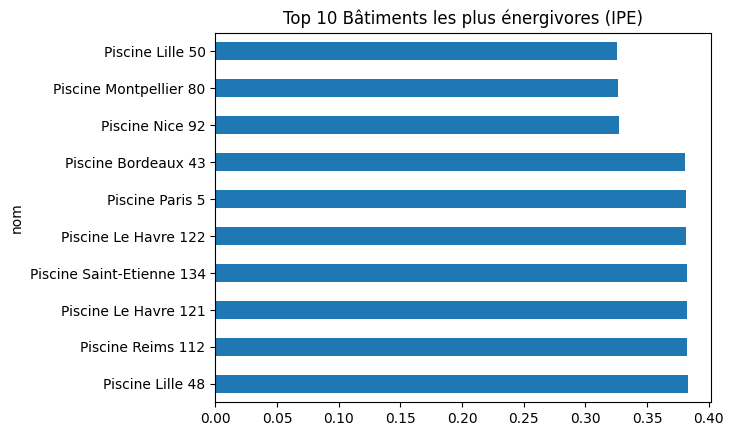

In [20]:
top_10_plus = df_conso_enrichies.groupby('nom')['ipe'].mean().sort_values(ascending=False).head(10)
top_10_plus.plot(kind='barh', title="Top 10 Bâtiments les plus énergivores (IPE)")

<Axes: title={'center': 'Top 10 Bâtiments les moins énergivores (IPE)'}, ylabel='nom'>

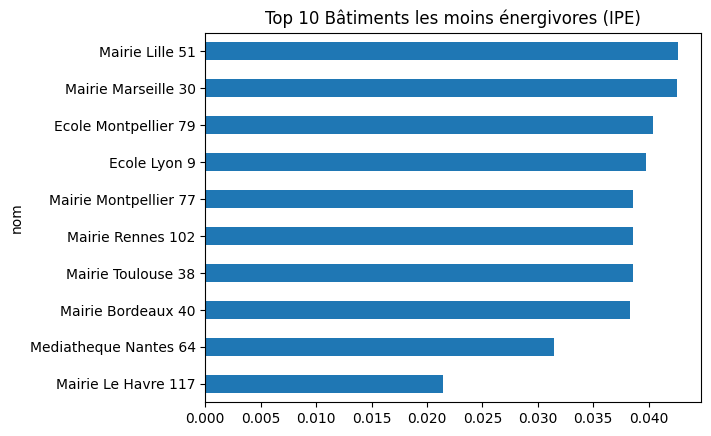

In [21]:
top_10_moins = df_conso_enrichies.groupby('nom')['ipe'].mean().sort_values(ascending=True).head(10)
top_10_moins.plot(kind='barh', title="Top 10 Bâtiments les moins énergivores (IPE)")

### Répartitions des consommations par classe énergetique DPE

In [ ]:
# je m'aperçois maintenant que la colonne "classe_energique" n'est pas dans mon dataframe, je la rajoute donc manuellement avec une jointure sur batiment_id 

df_bat_brut = pd.read_csv("../data_ecf/batiments.csv")

df_bat_light = df_bat_brut[['batiment_id', 'classe_energetique']] 

df_conso_enrichies = df_conso_enrichies.merge(df_bat_light, on='batiment_id', how='left')

print("La colonne classe_energetique a été réintégrée !")

La colonne classe_energetique a été réintégrée !


In [27]:
df_repart_conso = df_conso_enrichies.groupby("classe_energetique")["conso_mean"].agg([
    "sum",
    "min",
    "max",
    "count", 
    "std"  
])
print(df_repart_conso)

                             sum   min      max    count         std
classe_energetique                                                  
A                   6.414408e+06  0.03   262.28   145814   49.604331
B                   7.284465e+07  0.12  1606.22   365436  265.737163
C                   1.369795e+08  0.02  2602.19  1090308  267.204662
D                   3.999529e+08  0.02  3196.77  1671176  381.630848
E                   3.629746e+08  0.02  4137.66  1747920  409.069445
F                   9.848930e+08  0.04  5409.78  2691412  600.227312
G                   1.007621e+09  0.05  6348.19  2908722  595.604243


### Evolution temporelle (tendances mensuelles, saisonnalité)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_33564\134203976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=saison_stats, x='season', y='conso_mean', palette='viridis')


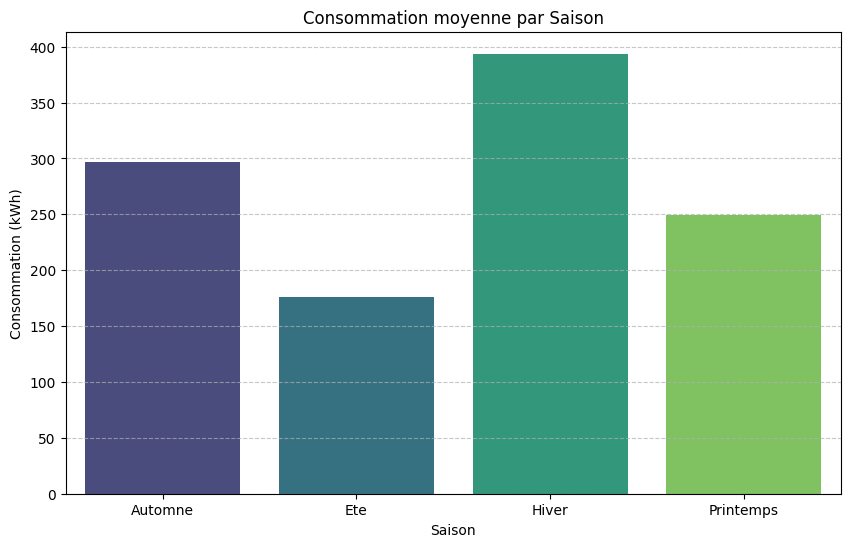

In [29]:
saison_stats = df_conso_enrichies.groupby('season')['conso_mean'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=saison_stats, x='season', y='conso_mean', palette='viridis')

plt.title("Consommation moyenne par Saison")
plt.ylabel("Consommation (kWh)")
plt.xlabel("Saison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_33564\1289733527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_stats, x='month', y='conso_mean', palette='viridis')


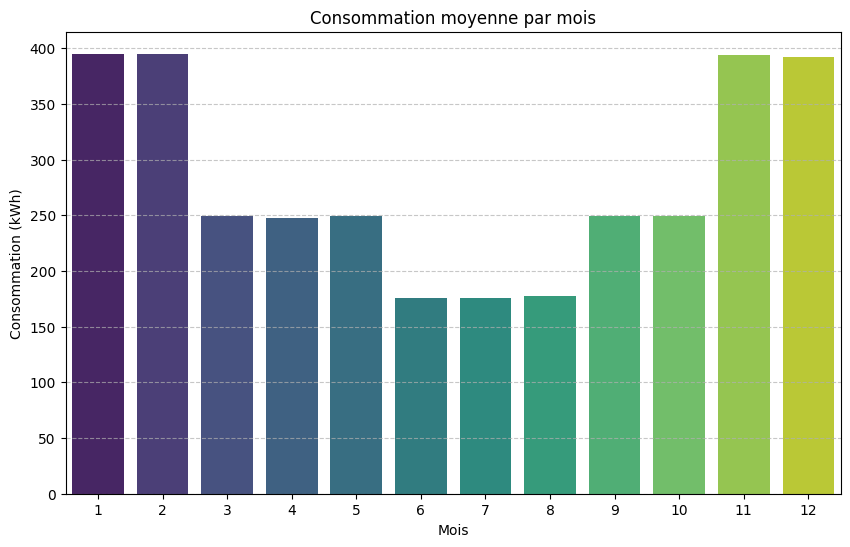

In [30]:
month_stats = df_conso_enrichies.groupby('month')['conso_mean'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=month_stats, x='month', y='conso_mean', palette='viridis')

plt.title("Consommation moyenne par mois")
plt.ylabel("Consommation (kWh)")
plt.xlabel("Mois")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Comparaison consommation theorique vs réelle

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_33564\1538677320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_conso_enrichies, x='classe_energetique', y='ipe', order=ordre_dpe, palette='RdYlGn_r')


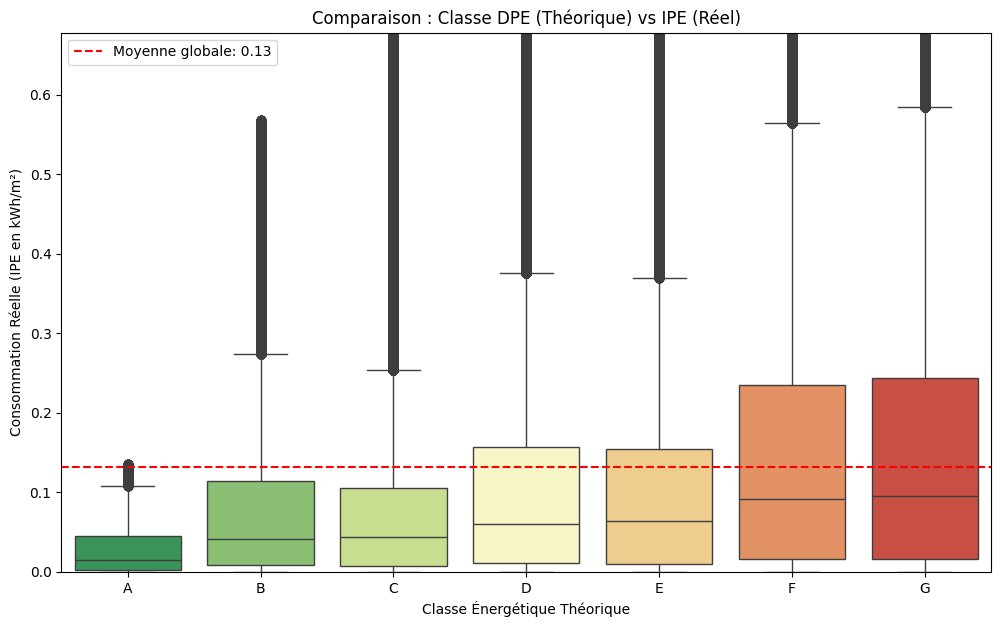

In [34]:
ordre_dpe = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_conso_enrichies, x='classe_energetique', y='ipe', order=ordre_dpe, palette='RdYlGn_r')

plt.axhline(df_conso_enrichies['ipe'].mean(), color='red', linestyle='--', label=f'Moyenne globale: {df_conso_enrichies["ipe"].mean():.2f}')

plt.title("Comparaison : Classe DPE (Théorique) vs IPE (Réel)")
plt.xlabel("Classe Énergétique Théorique")
plt.ylabel("Consommation Réelle (IPE en kWh/m²)")
plt.legend()


plt.ylim(0, df_conso_enrichies['ipe'].quantile(0.98)) 
plt.show()

In [35]:
conso_attendue = df_conso_enrichies.groupby('classe_energetique')['ipe'].transform('mean')

df_conso_enrichies['ecart_performance_%'] = ((df_conso_enrichies['ipe'] - conso_attendue) / conso_attendue) * 100

anomalies = df_conso_enrichies.sort_values('ecart_performance_%', ascending=False)[['nom', 'classe_energetique', 'ipe', 'ecart_performance_%']].head(5)
print("Bâtiments surconsommant par rapport à leur classe DPE :")
display(anomalies)

Bâtiments surconsommant par rapport à leur classe DPE :


,nom,classe_energetique,ipe,ecart_performance_%
2201591,Piscine Toulouse 37,C,0.7300,911.989336
2201593,Piscine Toulouse 37,C,0.7300,911.989336
2201595,Piscine Toulouse 37,C,0.7300,911.989336
2201597,Piscine Toulouse 37,C,0.7300,911.989336
2534494,Piscine Rennes 105,C,0.7295,911.296192
